In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import queue

In [2]:
mazeOri = open("maze.txt", "r") #a file of 2601 row with each row having a single boolean value 
matrix = []
for i in range(51):
    row = []
    for j in range(51):
        value = mazeOri.readline() #remove the newline character
        row.append(value)
    matrix.append(row) #create a matrix of 51*51 
    
print(type(matrix[1][1])) #assess if the condition paramter used below is string or boolean value 

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == "True\n":
            matrix[i][j] = 1
        else:
            matrix[i][j] = 0
        
print(matrix)
mazeGrid = np.array(matrix)

 #------- First Person ---------

<class 'str'>
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 

In [3]:
def showBinaryMaze(mazemap):
    (height, width) = mazemap.shape 
    #mazemap = mazemap * 255 #scales from 0 and 1 to 0
    f = plt.figure(figsize = (width, height))
    heatmap(mazemap, vmin = 0, vmax = 1, cmap = "Greys", cbar = False) 
    

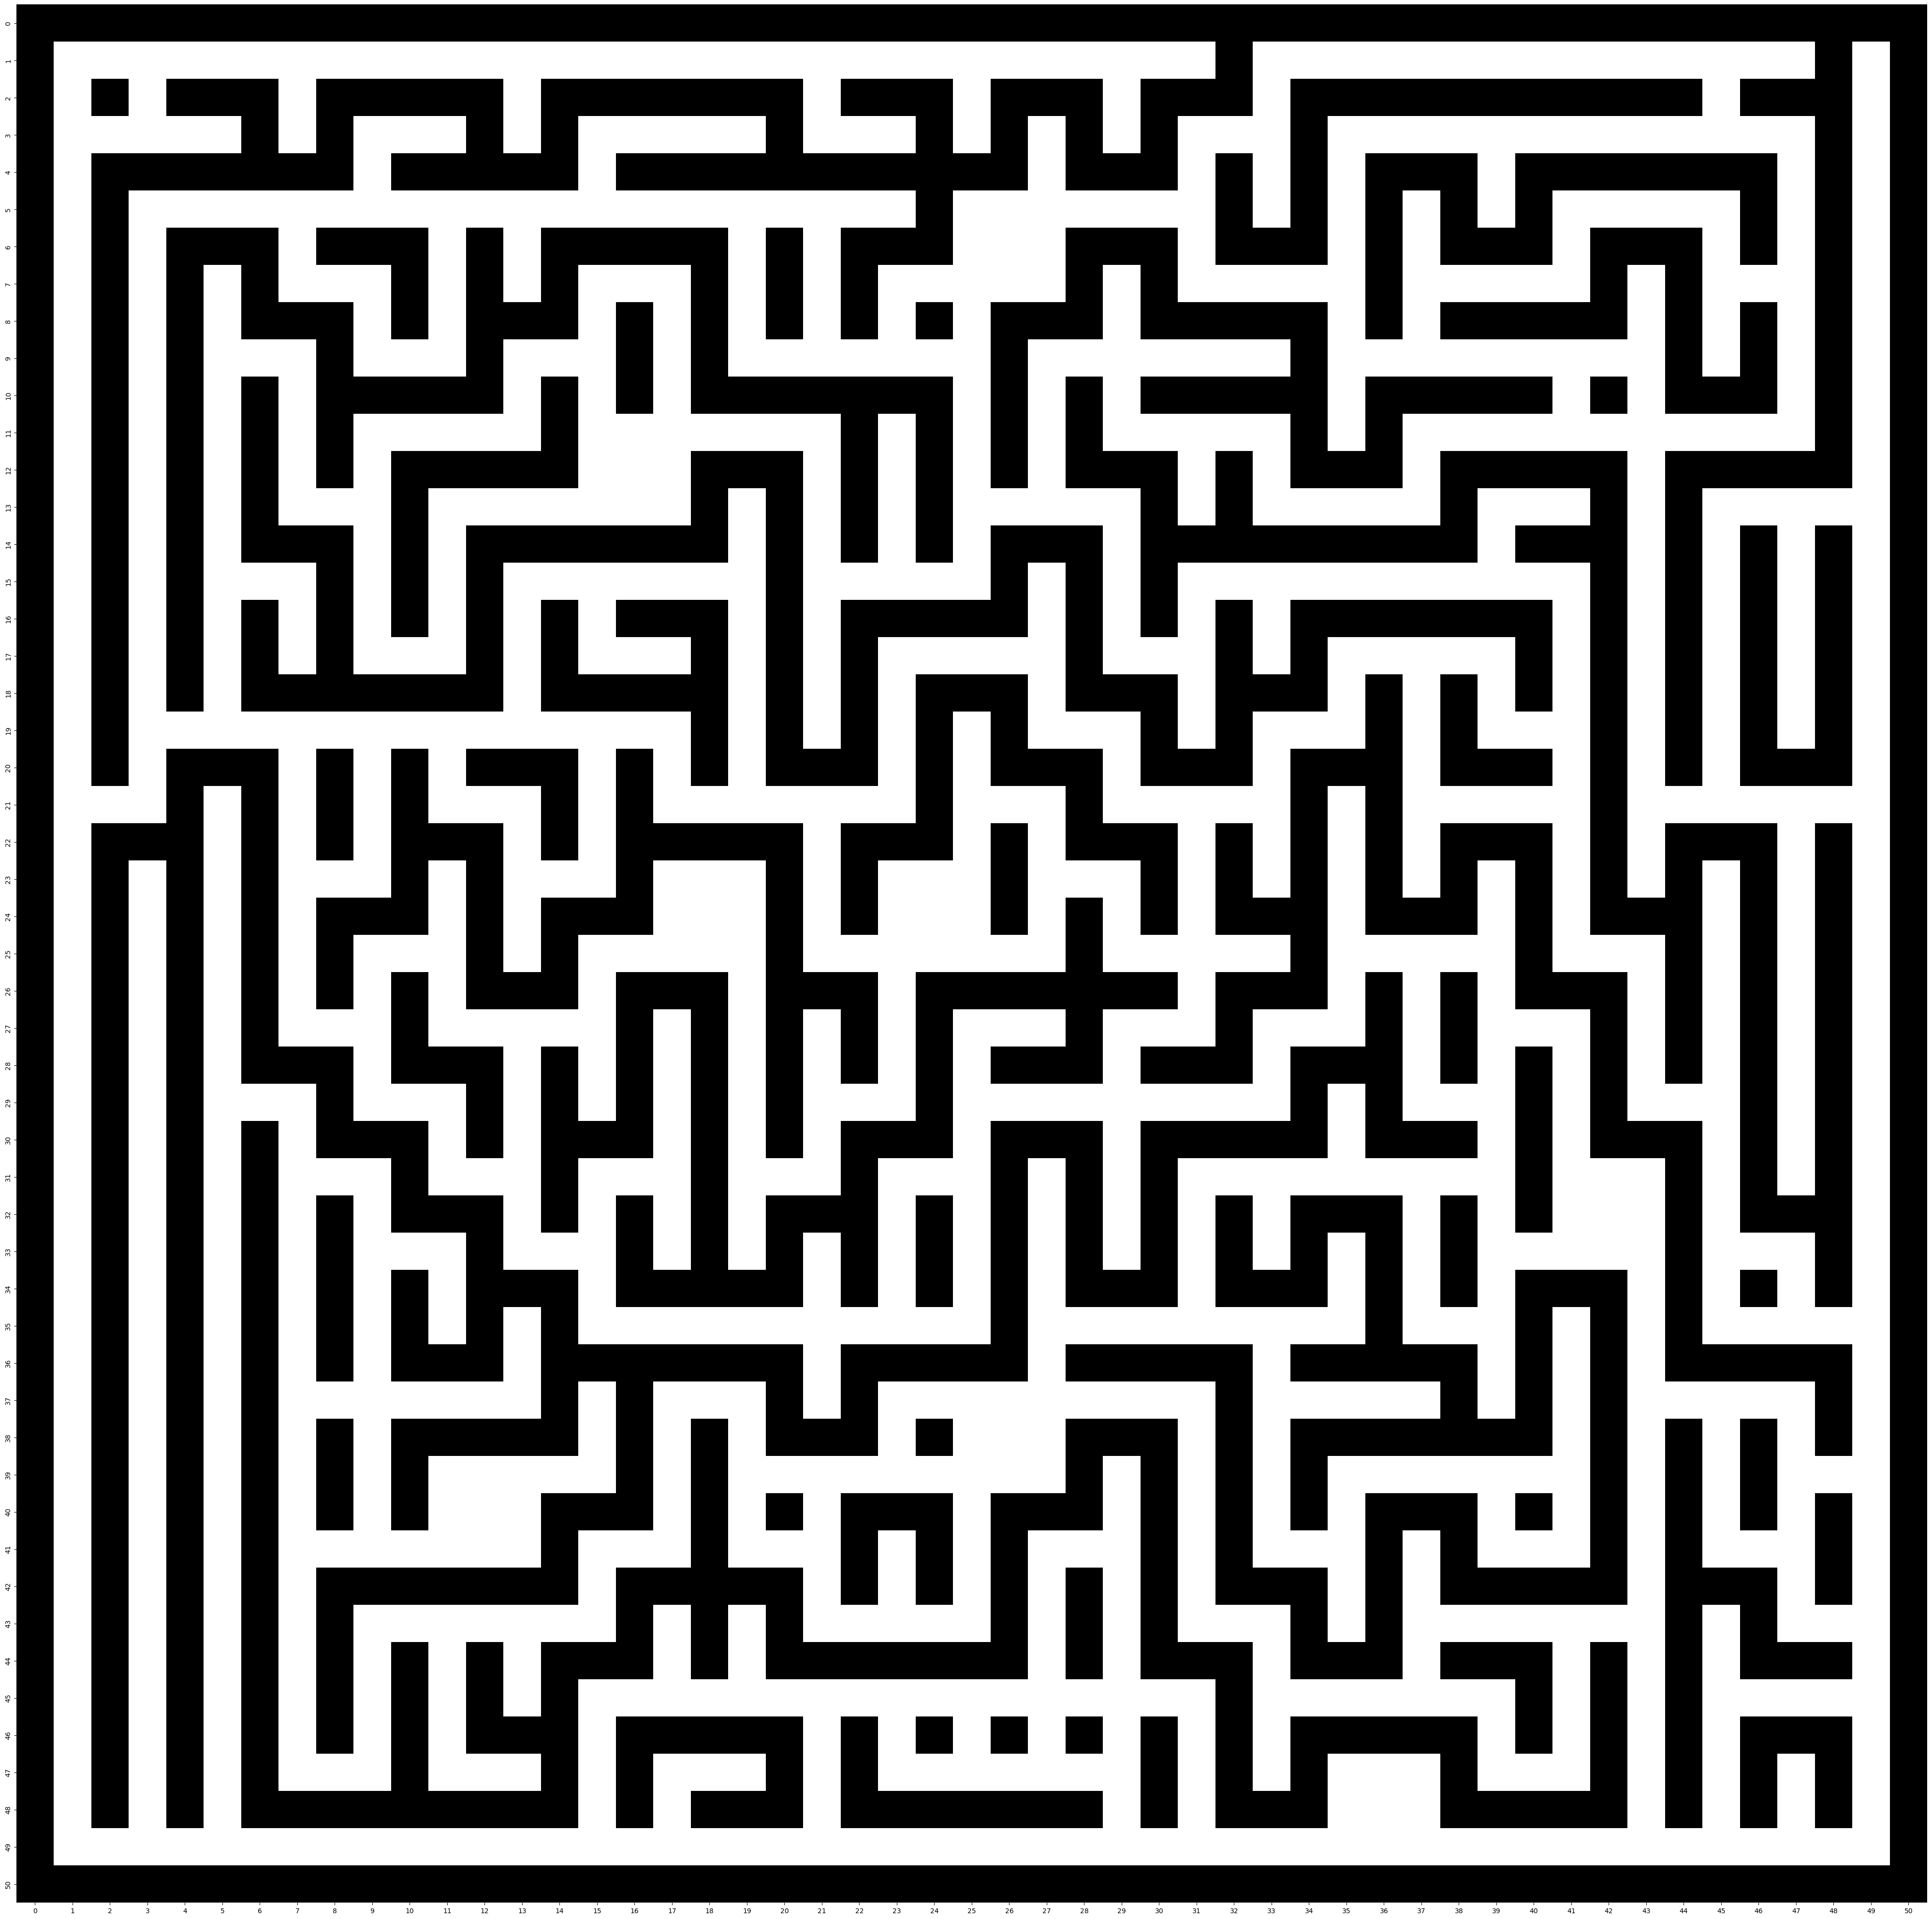

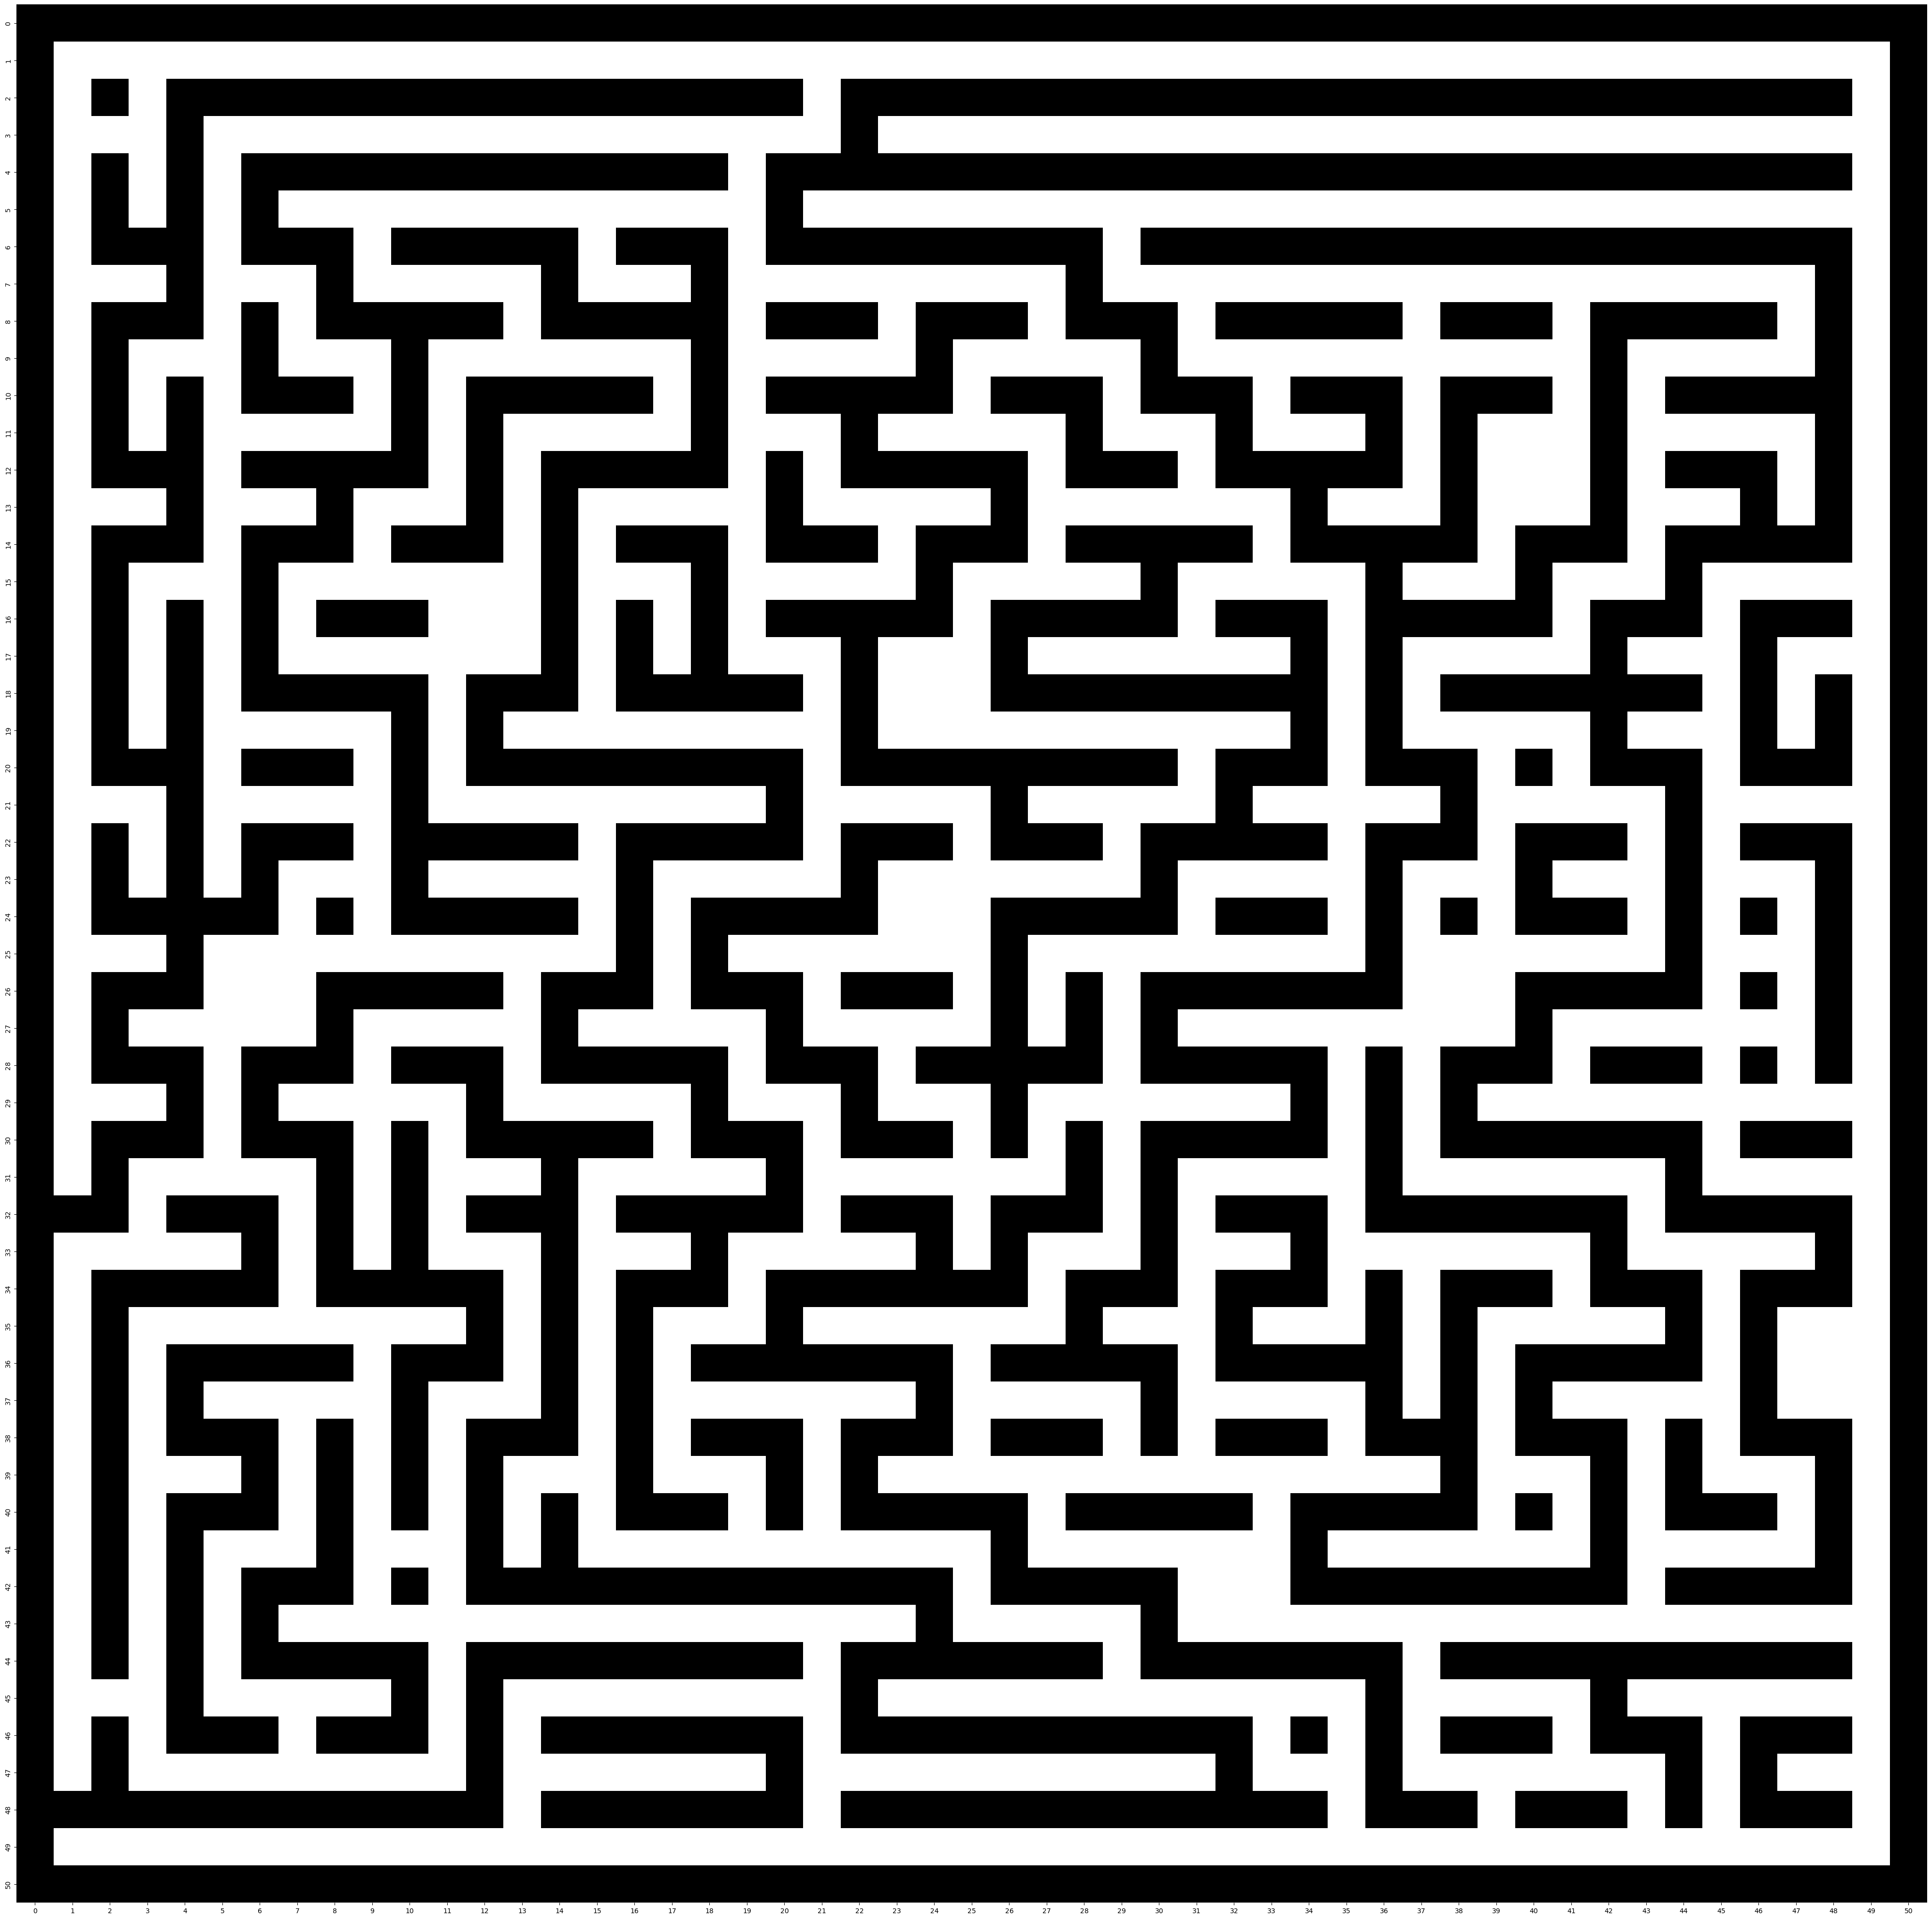

In [4]:
showBinaryMaze(mazeGrid)
matrix2 = []
for i in range(51):
    row = [] #initialise an empty list that will be the row of the final matrix
    for j in range(51):
        value2 = matrix[j][i] #make the first value of each list into a new list i.e. read the data vertically
        row.append(value2) #add each of the first value to the empty list of row 
    matrix2.append(row) #after 51 values is added, add the row list into the matrix2 

mazeGrid2 = np.array(matrix2) #makes it an array
showBinaryMaze(mazeGrid2) #display matrix2 


 #------- Second Person ---------

In [5]:
def showMazeProblem(maze, start, end): #the same function as above but label the start and the end point
    (height, width) = maze.shape
    maze = maze * 255 #scales to fix the problem of a integer matrix
    maze[start[0]][start[1]]=150 #change the colour of the starting point
    maze[end[0]][end[1]]=80 #change the colour of the end point
    f = plt.figure(figsize = (width,height))
    heatmap(maze,  cmap = "YlGnBu", cbar = True)
    
    
    

Please insert the starting location separated by comma: 1,49
Please insert the goal location separated by comma: 45,9


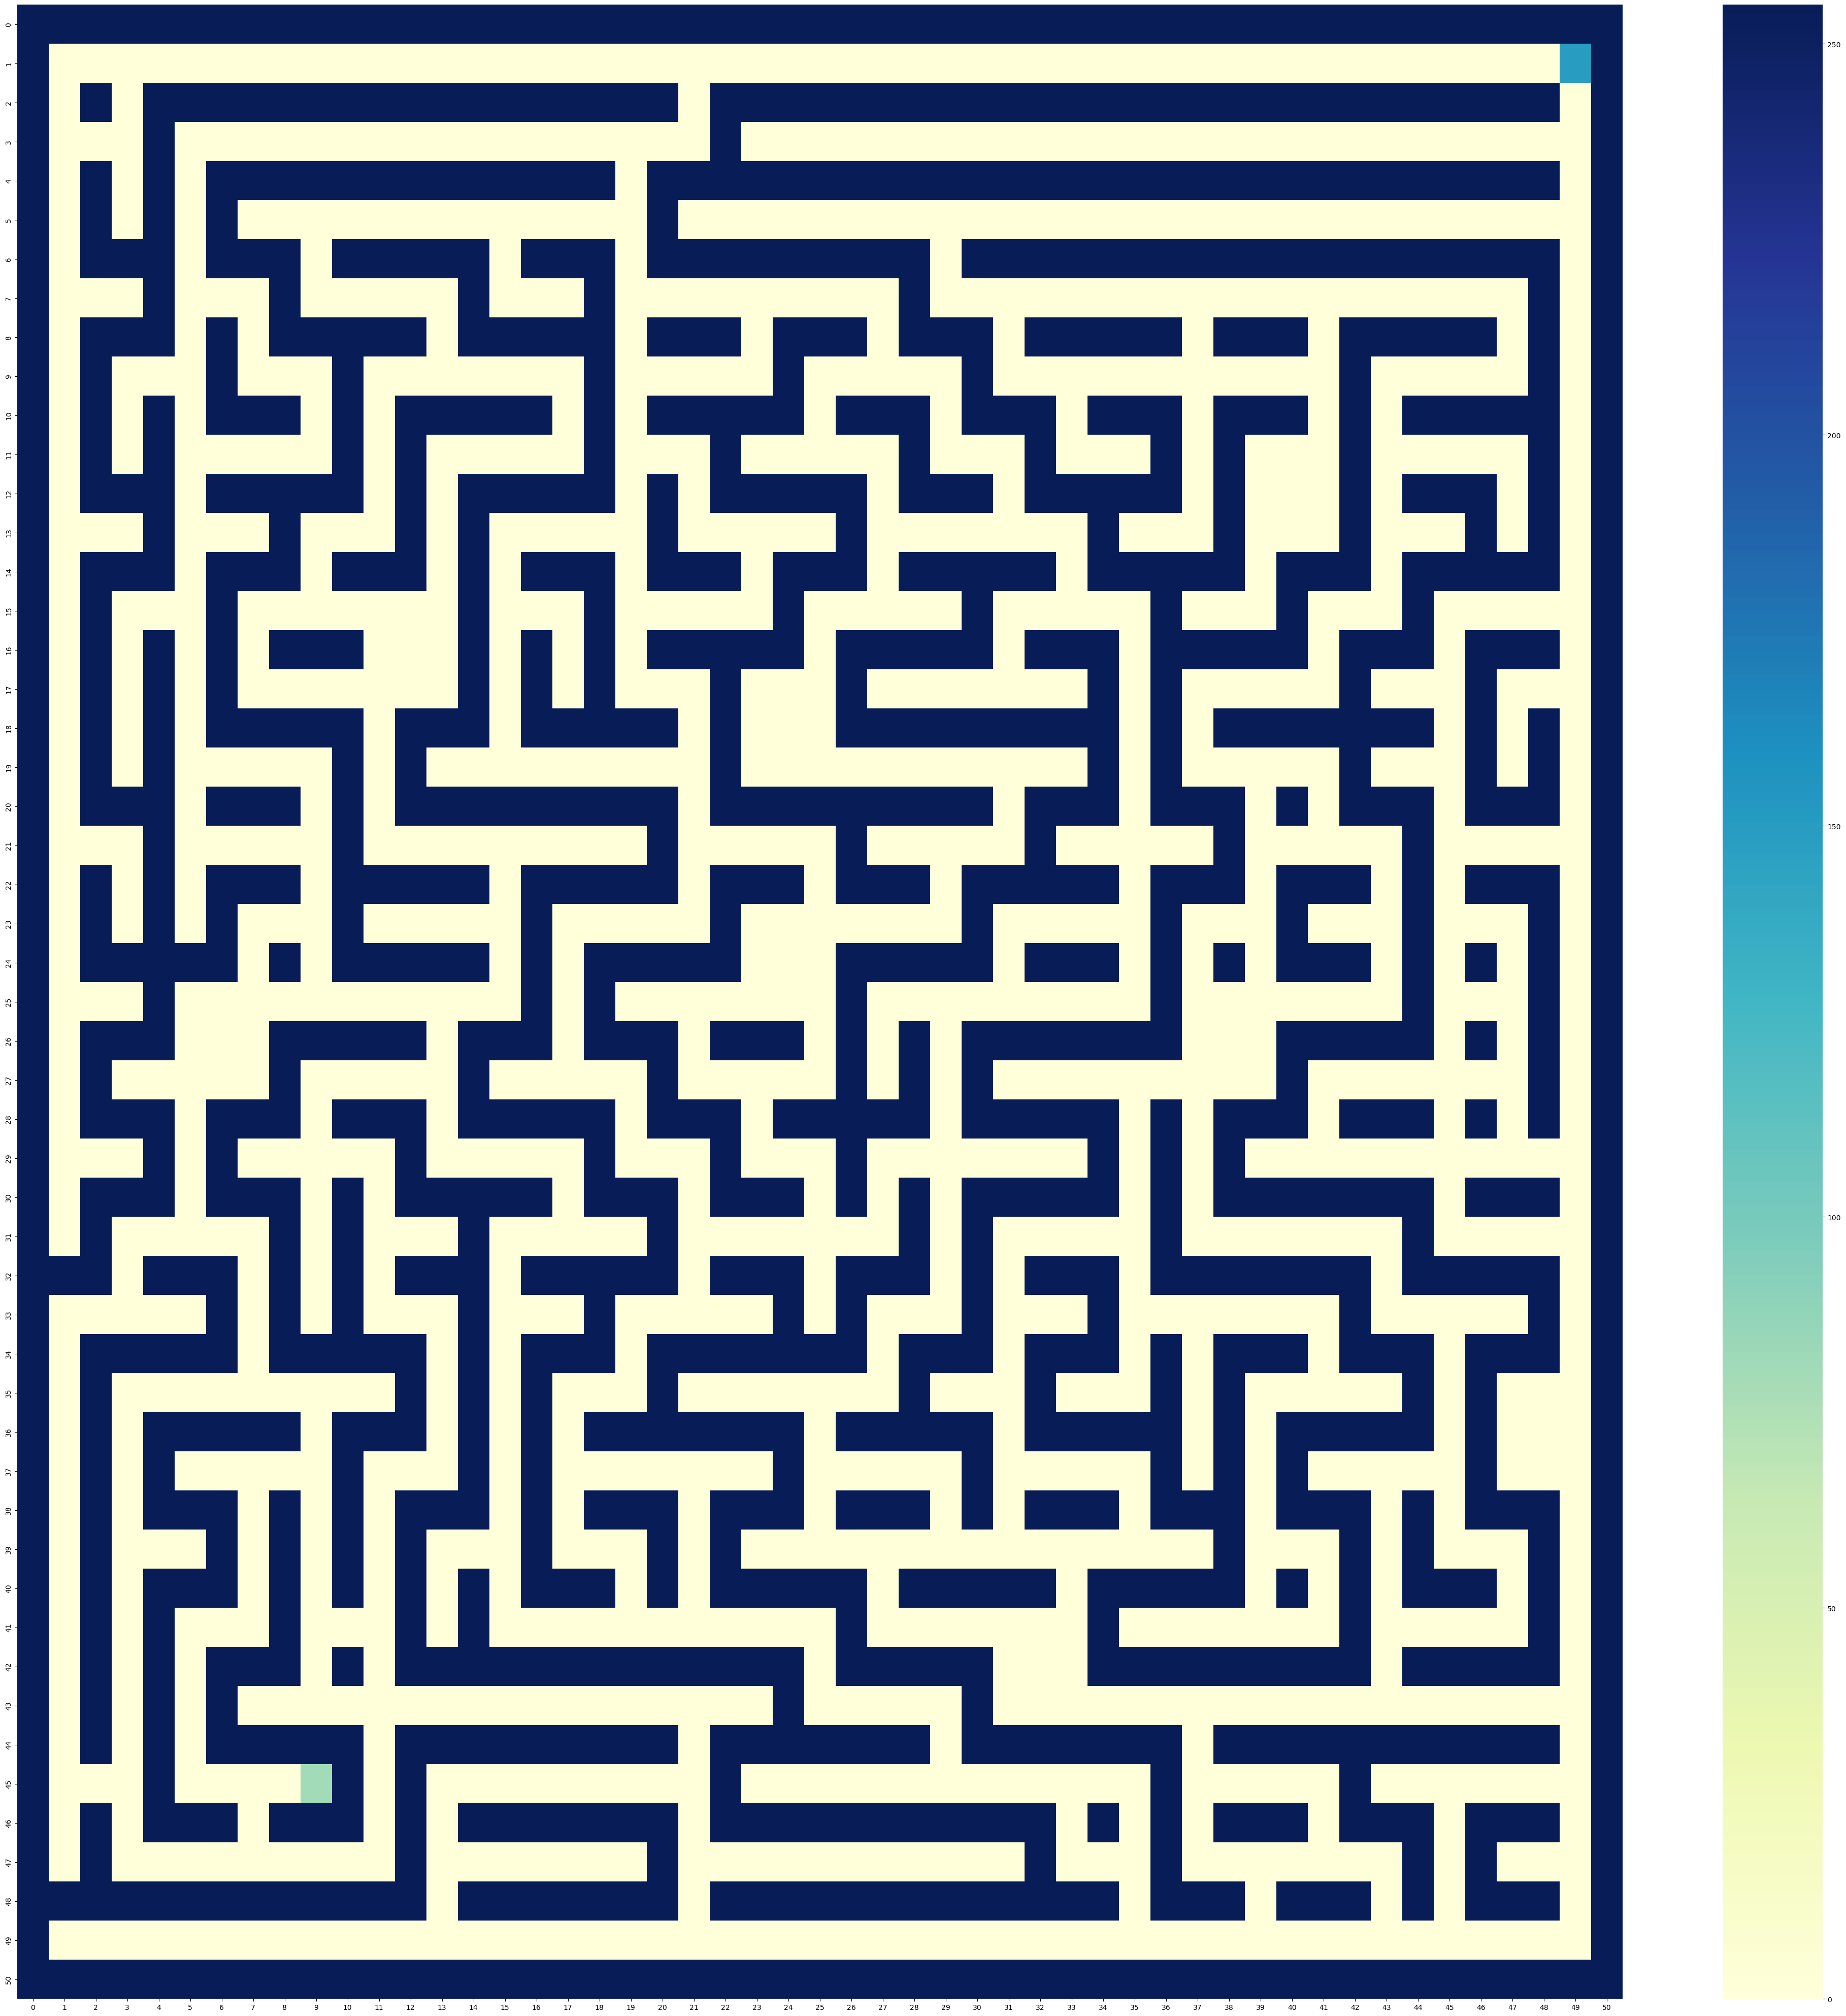

In [6]:
Start = list(input("Please insert the starting location separated by comma: ").split(","))
Start[0], Start[1]=int(Start[0]), int(Start[1])
Start = tuple(Start) #make the starting point a tuple in the form (x, y)

Goal = list(input("Please insert the goal location separated by comma: ").split(","))
Goal[0], Goal[1]=int(Goal[0]), int(Goal[1])
Goal = tuple(Goal)
#Goal = (47, 1)
showMazeProblem(mazeGrid2, Start, Goal)

 #------- Third Person ---------

In [7]:
def heuristic (nodeA, nodeB): #define a distance 
    (xA, yA) = nodeA #coordinate of point A
    (xB, yB) = nodeB #coordinate of point B
    distance = abs(xA-xB) + abs(yA-yB) #absolute distance between A and B
    return distance

def neighbors(maze, node):
    x, y = node[0], node[1] #assign x and y as the coordinate of node 
    neighbors = [] #initiate a empty list
    if 0 <= x+1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0: #assess node on the top
        neighbors.append((x+1, y)) #if it is in the maze size and not blocked by  wall, add to list neighbor 
    if 0 <= x-1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0: #assess node on the botom
        neighbors.append((x-1, y)) 
    if 0 <= x <= len(maze[y]) and 0 <= y+1 <= len(maze) and maze[x][y] == 0: #assess node on the right
        neighbors.append((x, y+1))
    if 0 <= x <= len(maze[y]) and 0 <= y-1 <= len(maze) and maze[x][y] == 0: #assess node on the right
        neighbors.append((x, y-1))
    return neighbors #return a list of possible neighbor nodes (coordinates)
        
        
def Search (maze, start, goal): 
    
    frontier = queue.PriorityQueue() #create frontier with the specific data structure priority queue
    frontier.put((0, start)) #Add the starting point with highest priority (smallest number) into the queue, frontier. 
    parent = {} #initiate a dictionary that keep track of child nodes as keys and parent nodes as values
    parent[start] = None #the starting point has no parent node, therefore assigned to none
    pathcost = {start: 0} #the pathcost from one point to the starting point, from start to start is 0. 
    processed = 0 #the number of processed nodes, initialised as 0. 
    
    
 #------- Fourth Person ---------
    
    while not frontier.empty(): #as long as the queue is not empty, so not every node has been explored
        currentNode = frontier.get()[1] #obtain a value from the queue with the highest priority ie. the starting point
        processed = processed + 1
        
        if currentNode == goal: #if the current node is the goal, then it ends. 
            break 
            
        for neighbor in neighbors(maze, currentNode): #for each values in the previously defined neighbor list
            new_cost = pathcost[currentNode] + 1 #the pathcost increased by 1 as it moves to its neighbor
            if neighbor not in parent or new_cost < pathcost[neighbor]: #if the node is not explored or the shorter cost is found, update
                pathcost[neighbor] = new_cost #update the cost as the previous cost + 1
                priority = new_cost + heuristic(neighbor, goal) #the priority also take account of the distance from the node to the goal
                frontier.put((priority, neighbor))  #update the neighbor node with priority
                parent[neighbor] = currentNode #keep track of the parent node 
        
    return parent, pathcost, processed

#------- Fifth Person ---------

def pathfinding(parent, start, goal): #reverse track when the goal has been found
    path = [] #initiate the empty list to track the path
    currentNode = goal #start with the goal that has been identified
    
    while currentNode != start: #while it has not fully backtracked to the starting point
        path.append(currentNode) #add the current node to the path, initially, it is the goal
        currentNode = parent[currentNode] #update the current node as its parent to backtrack the paths 
        

    path.reverse() #reverse to go from start to the end
    path.pop() #remove the goal from the path
    
    return path

ExploredNodes,ExploredPathCost, ProcessedNodes = Search(mazeGrid2, Start, Goal) #assigned three variables by the three return of Search respectively
PathFound = pathfinding(ExploredNodes, Start, Goal)
print(PathFound)

[(2, 49), (3, 49), (4, 49), (5, 49), (6, 49), (7, 49), (8, 49), (9, 49), (10, 49), (11, 49), (12, 49), (13, 49), (14, 49), (15, 49), (16, 49), (17, 49), (18, 49), (19, 49), (20, 49), (21, 49), (22, 49), (23, 49), (24, 49), (25, 49), (26, 49), (27, 49), (28, 49), (29, 49), (30, 49), (31, 49), (32, 49), (33, 49), (34, 49), (35, 49), (36, 49), (37, 49), (38, 49), (39, 49), (40, 49), (41, 49), (42, 49), (43, 49), (44, 49), (45, 49), (45, 48), (45, 47), (45, 46), (45, 45), (46, 45), (47, 45), (48, 45), (49, 45), (49, 44), (49, 43), (49, 42), (49, 41), (49, 40), (49, 39), (49, 38), (49, 37), (49, 36), (49, 35), (49, 34), (49, 33), (49, 32), (49, 31), (49, 30), (49, 29), (49, 28), (49, 27), (49, 26), (49, 25), (49, 24), (49, 23), (49, 22), (49, 21), (48, 21), (47, 21), (46, 21), (45, 21), (44, 21), (43, 21), (43, 20), (43, 19), (43, 18), (43, 17), (43, 16), (43, 15), (43, 14), (43, 13), (43, 12), (43, 11), (44, 11), (45, 11), (46, 11), (47, 11), (47, 10), (47, 9), (47, 8), (47, 7), (46, 7), (

Shortest distance:  104


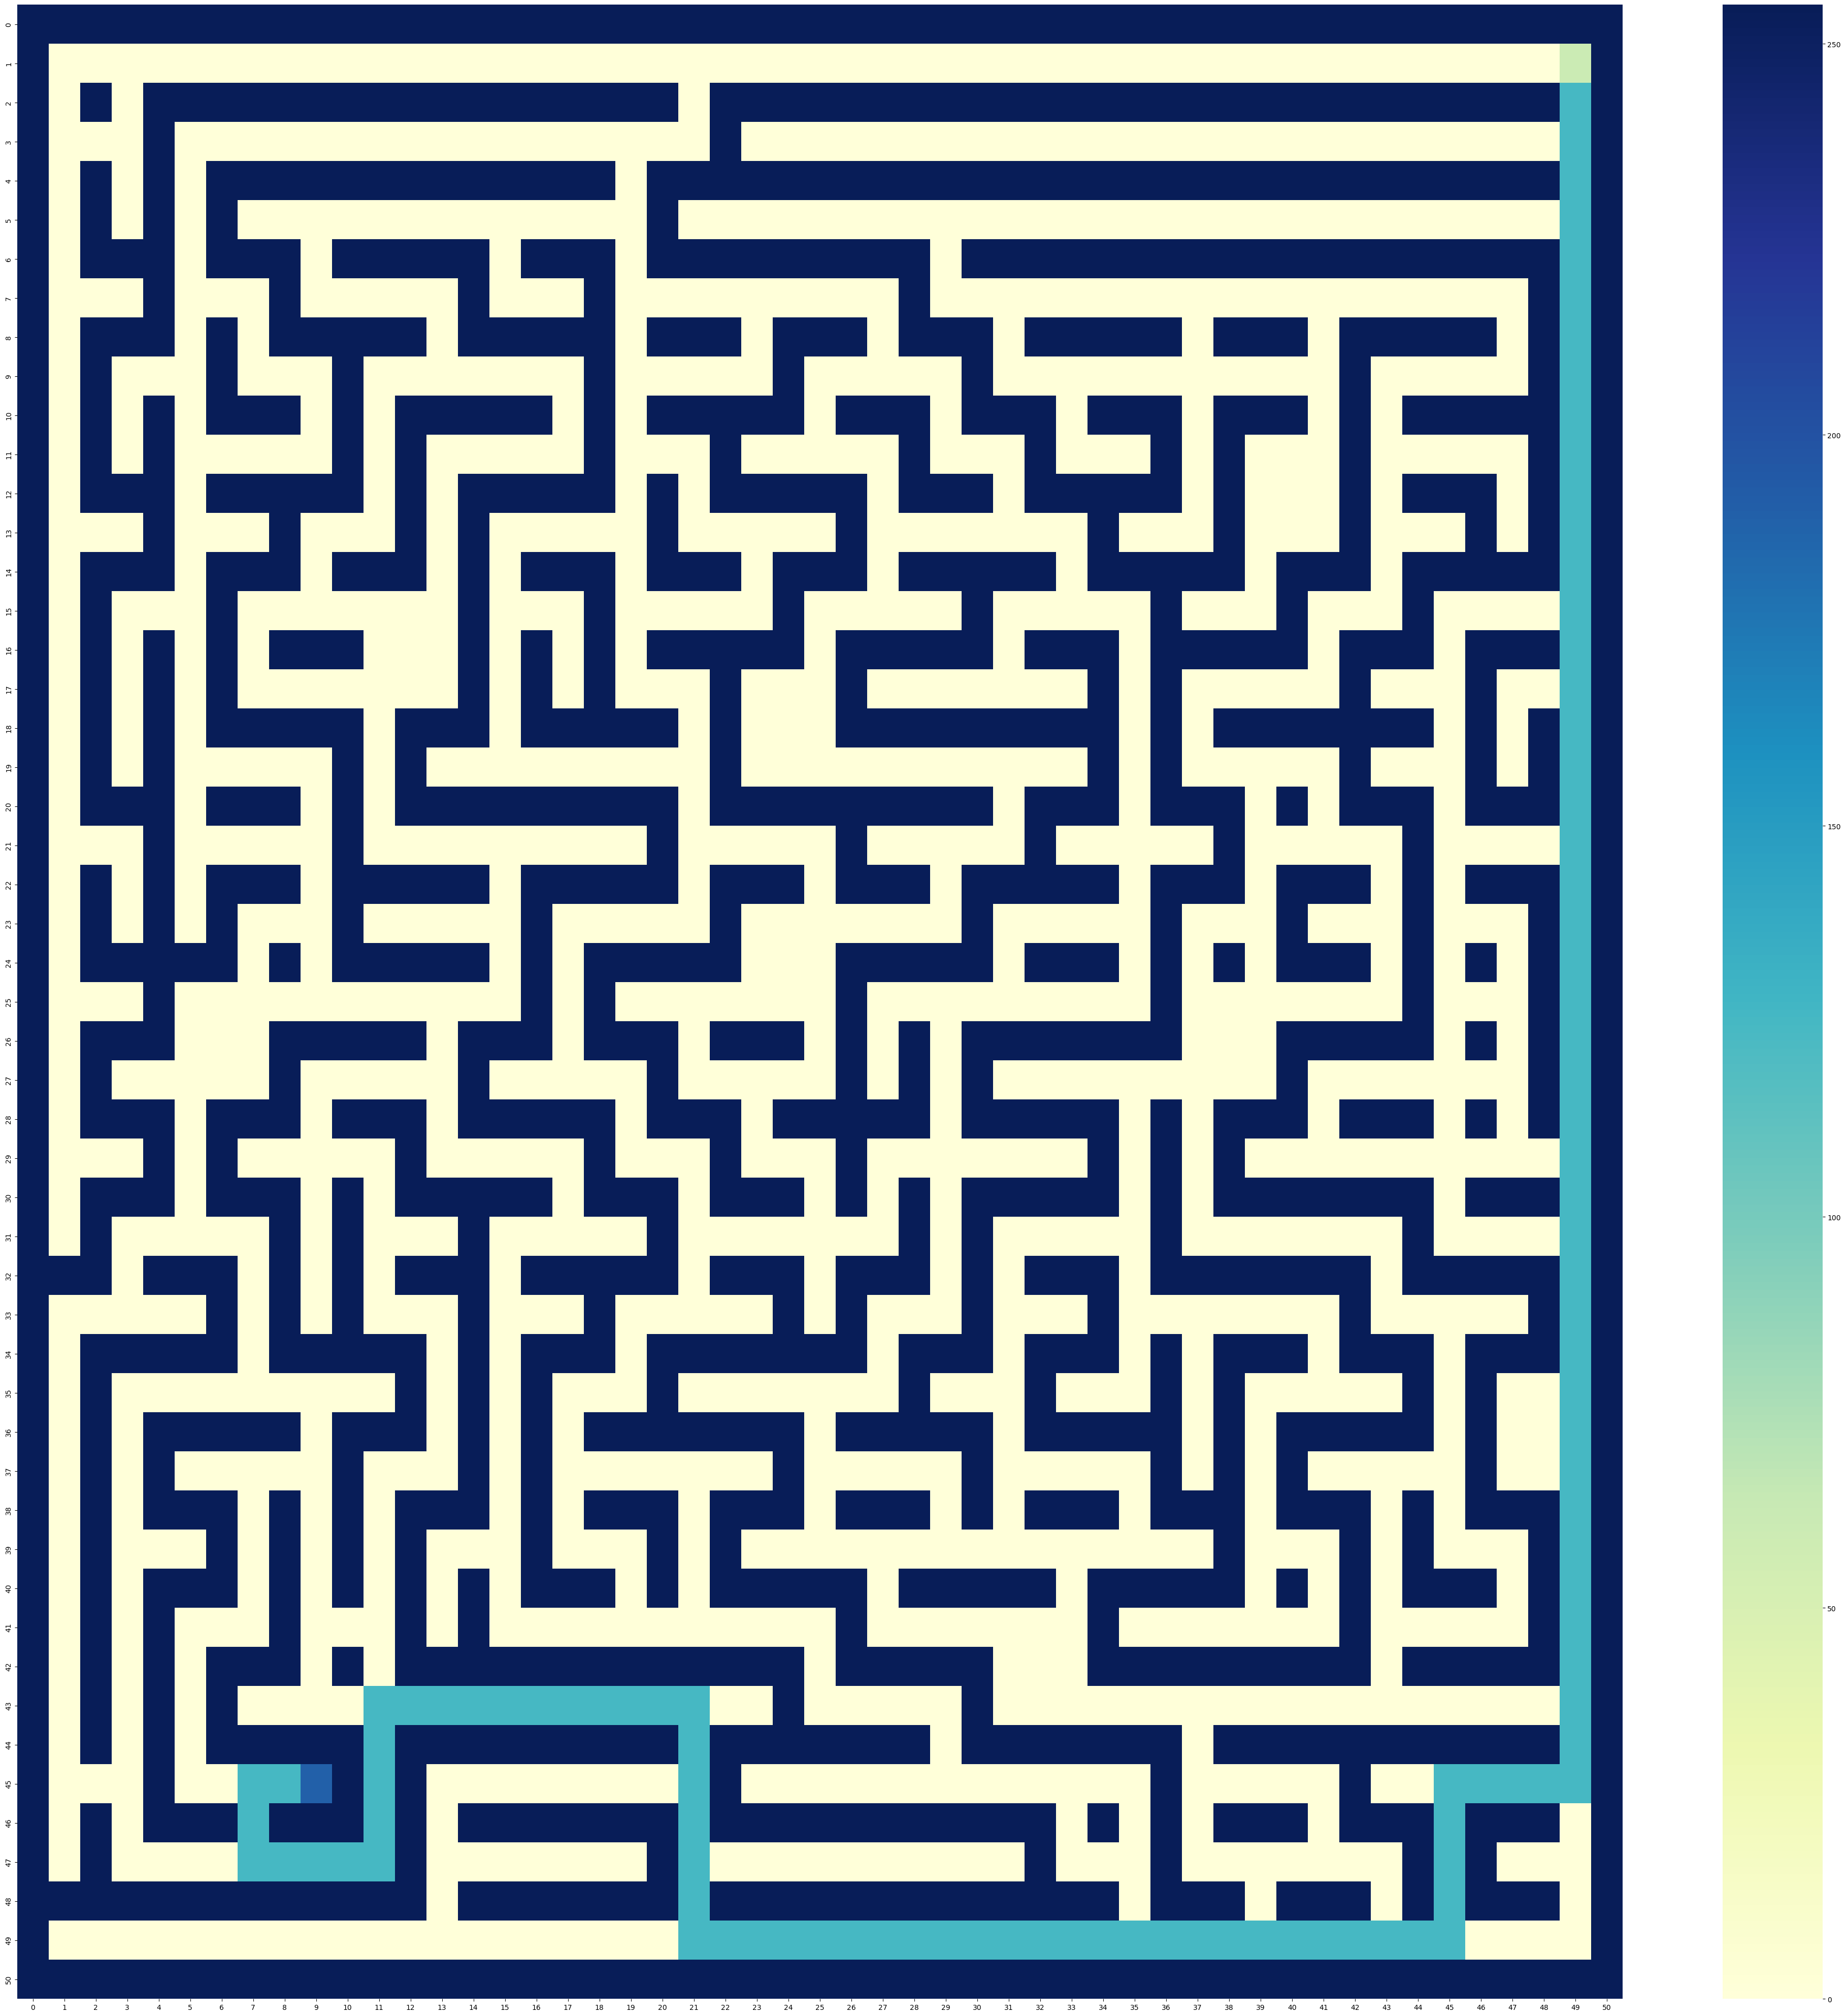

In [13]:
def ShowMazePath(maze, path, start, goal):
    height, width = maze.shape
    maze = maze * 255 #scales so that the matrix is now full of 0 and 255's. 
    maze[start[0]][start[1]]=60 #makes starting point a different colour
    maze[goal[0]][goal[1]]=190 #makes the ending point a different colour
    
    for node in path:
        maze[node[0]][node[1]] = 125 #for every node in path, change its colour by changing its position value to 125
    
    f = plt.figure(figsize = (width,height))
    heatmap(maze,  cmap = "YlGnBu", cbar = True)


#print("Number of Nodes explored:", len(ExploredNodes)) #print the number of explored nodes
#print("Total nodes visited: ", ProcessedNodes) #print the number of processed nodes
print("Shortest distance: ", len(PathFound) + 1) #print the shortest distance by counting the number of nodes in PathFound
ShowMazePath(mazeGrid2, PathFound, Start, Goal) #show the path 


In [9]:
"""def heuristic (nodeA, nodeB): #define a distance 
    (xA, yA) = nodeA #coordinate of point A
    (xB, yB) = nodeB #coordinate of point B
    distance = abs(xA-xB) + abs(yA-yB) #absolute distance between A and B
    return distance

def neighbors(maze, node):
    x, y = node[0], node[1] 
    #assign x and y as the coordinate of node 
    neighbors = [] 
    #initiate a empty list
    if 0 <= x+1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0: 
        #assess node on the top
        neighbors.append((x+1, y)) 
        #if it is in the maze size and not blocked by  wall, add to list neighbor 
    if 0 <= x-1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0:
        #assess node on the botom
        neighbors.append((x-1, y)) 
    if 0 <= x <= len(maze[y]) and 0 <= y+1 <= len(maze) and maze[x][y] == 0:
        #assess node on the right
        neighbors.append((x, y+1))
    if 0 <= x <= len(maze[y]) and 0 <= y-1 <= len(maze) and maze[x][y] == 0: 
        #assess node on the right
        neighbors.append((x, y-1))
    return neighbors 
    #return a list of possible neighbor nodes (coordinates)

Nodecount = 0
for i in range(51):
    for j in range(51):
        if matrix2[i][j] == 0:
            Nodecount += 1
print("The number of possible nodes :", Nodecount)
        
        
def Search (maze, start, goal): 
    
    frontier = queue.PriorityQueue()
    #create frontier with the specific data structure priority queue
    frontier.put((0, start)) 
    #Add the starting point with highest priority (smallest number) into the queue, frontier. 
    parent = {} 
    #initiate a dictionary that keep track of child nodes as keys and parent nodes as values
    parent[start] = None 
    #the starting point has no parent node, therefore assigned to none
    pathcost = {start: 0}
    #the pathcost from one point to the starting point, from start to start is 0. 
    processed = 0 
    #the number of processed nodes, initialised as 0. 
    
    while not frontier.empty(): 
        #as long as the queue is not empty, so not every node has been explored
        currentNode = frontier.get()[1] 
        #obtain a value from the queue with the highest priority ie. the starting point
        processed = processed + 1 
        
        if len(parent) == Nodecount: 
            #if all nodes have a parent i.e. all nodes have been explored
            break 
            
        for neighbor in neighbors(maze, currentNode): 
            new_cost = pathcost[currentNode] + 1 
            
            if neighbor not in parent: 
                pathcost[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal) 
                frontier.put((priority, neighbor))  

                
                if currentNode in parent.values():
                    if type(parent[last_neighbor]) == tuple:
                        old_values = parent[last_neighbor]
                        parent[last_neighbor] = {"1" : old_values, "2":currentNode}
                    elif type(parent[last_neighbor]) == dict:
                        dummyDict = {}
                        
                        for i in range(len(parent[last_neighbor])):
                            i = i + 1
                            i_str = str(i)
                            dummyDict[i_str] = parent[last_neighbor][i]
                        dummyDict[i+1] = neighbor
                        parent[currentNode] = dummyDict
                else: 
                    parent[currentNode] = neighbor
                    last_neighbor = neighbor
            
        print(parent)
                #keep track of the parent node 
        
    return parent, pathcost, processed


def pathfinding(parent, start, goal): 
    #reverse track when the goal has been found
    AllPath = {}
    
    while goal in parent:
        
        path = [] 
        #initiate the empty list to track the path
        NextNode = goal
        #start with the goal that has been identified
    
        while NextNode != start: 
            #while it has not fully backtracked to the starting point
            currentNode = NextNode
            path.append(currentNode) 
            #add the current node to the path, initially, it is the goal
            NextNode = parent[currentNode] 
            del parent[currentNode]
            #update the current node as its parent to backtrack the paths 
        

        path.reverse() 
        #reverse to go from start to the end
        path.pop() 
        #remove the goal from the path
        AllPath.append(path)
    
    return AllPath

ExploredNodes,ExploredPathCost, ProcessedNodes = Search(mazeGrid2, Start, Goal) #assigned three variables by the three return of Search respectively
#PathFound = pathfinding(ExploredNodes, Start, Goal)

print(ExploredNodes)"""

'def heuristic (nodeA, nodeB): #define a distance \n    (xA, yA) = nodeA #coordinate of point A\n    (xB, yB) = nodeB #coordinate of point B\n    distance = abs(xA-xB) + abs(yA-yB) #absolute distance between A and B\n    return distance\n\ndef neighbors(maze, node):\n    x, y = node[0], node[1] \n    #assign x and y as the coordinate of node \n    neighbors = [] \n    #initiate a empty list\n    if 0 <= x+1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0: \n        #assess node on the top\n        neighbors.append((x+1, y)) \n        #if it is in the maze size and not blocked by  wall, add to list neighbor \n    if 0 <= x-1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0:\n        #assess node on the botom\n        neighbors.append((x-1, y)) \n    if 0 <= x <= len(maze[y]) and 0 <= y+1 <= len(maze) and maze[x][y] == 0:\n        #assess node on the right\n        neighbors.append((x, y+1))\n    if 0 <= x <= len(maze[y]) and 0 <= y-1 <= len(maze) and maze[x][y] ==

In [10]:
"""def heuristic (nodeA, nodeB): #define a distance 
    (xA, yA) = nodeA #coordinate of point A
    (xB, yB) = nodeB #coordinate of point B
    distance = abs(xA-xB) + abs(yA-yB) #absolute distance between A and B
    return distance

def neighbors(maze, node):
    x, y = node[0], node[1] 
    #assign x and y as the coordinate of node 
    neighbors = [] 
    #initiate a empty list
    if 0 <= x+1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0: 
        #assess node on the top
        neighbors.append((x+1, y)) 
        #if it is in the maze size and not blocked by  wall, add to list neighbor 
    if 0 <= x-1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0:
        #assess node on the botom
        neighbors.append((x-1, y)) 
    if 0 <= x <= len(maze[y]) and 0 <= y+1 <= len(maze) and maze[x][y] == 0:
        #assess node on the right
        neighbors.append((x, y+1))
    if 0 <= x <= len(maze[y]) and 0 <= y-1 <= len(maze) and maze[x][y] == 0: 
        #assess node on the right
        neighbors.append((x, y-1))
    return neighbors 
    #return a list of possible neighbor nodes (coordinates)

Nodecount = 0
for i in range(51):
    for j in range(51):
        if matrix2[i][j] == 0:
            Nodecount += 1
print("The number of possible nodes :", Nodecount)
        
        
def Search (maze, start, goal): 
    
    frontier = queue.PriorityQueue()
    #create frontier with the specific data structure priority queue
    frontier.put((0, start)) 
    #Add the starting point with highest priority (smallest number) into the queue, frontier. 
    parent = {} 
    #initiate a dictionary that keep track of child nodes as keys and parent nodes as values
    parent[start] = [None] 
    #the starting point has no parent node, therefore assigned to none
    pathcost = {start: 0}
    #the pathcost from one point to the starting point, from start to start is 0. 
    processed = 0 
    #the number of processed nodes, initialised as 0. 
    
    while not frontier.empty(): 
        #as long as the queue is not empty, so not every node has been explored
        currentNode = frontier.get()[1] 
        #obtain a value from the queue with the highest priority ie. the starting point
        processed = processed + 1 
        
        if len(parent) == Nodecount: 
            #if all nodes have a parent i.e. all nodes have been explored
            break 
            
        for neighbor in neighbors(maze, currentNode): 
            new_cost = pathcost[currentNode] + 1 
            
            if neighbor not in parent.values(): 
                pathcost[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal) 
                frontier.put((priority, neighbor))  

                
                if currentNode in parent:
                    parent[currentNode].append(neighbor)

            else: 
                parent[currentNode] = [neighbor]
            
        print(parent)
                #keep track of the parent node 
        
    return parent, pathcost, processed
ExploredNodes,ExploredPathCost, ProcessedNodes = Search(mazeGrid2, Start, Goal) #assigned three variables by the three return of Search respectively
#PathFound = pathfinding(ExploredNodes, Start, Goal)

print(ExploredNodes)
print(processed)

"""

'def heuristic (nodeA, nodeB): #define a distance \n    (xA, yA) = nodeA #coordinate of point A\n    (xB, yB) = nodeB #coordinate of point B\n    distance = abs(xA-xB) + abs(yA-yB) #absolute distance between A and B\n    return distance\n\ndef neighbors(maze, node):\n    x, y = node[0], node[1] \n    #assign x and y as the coordinate of node \n    neighbors = [] \n    #initiate a empty list\n    if 0 <= x+1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0: \n        #assess node on the top\n        neighbors.append((x+1, y)) \n        #if it is in the maze size and not blocked by  wall, add to list neighbor \n    if 0 <= x-1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0:\n        #assess node on the botom\n        neighbors.append((x-1, y)) \n    if 0 <= x <= len(maze[y]) and 0 <= y+1 <= len(maze) and maze[x][y] == 0:\n        #assess node on the right\n        neighbors.append((x, y+1))\n    if 0 <= x <= len(maze[y]) and 0 <= y-1 <= len(maze) and maze[x][y] ==

In [11]:
"""# Define function to get all possible paths and their costs
def find_all_paths(maze, start, end):
    paths = []
    stack = [(start, [start], 0)]
    while stack:
        (x, y), path, cost = stack.pop()
        if (x, y) == end:
            paths.append((path, cost))
        else:
            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 0 and (nx, ny) not in path:
                    stack.append(((nx, ny), path + [(nx, ny)], cost + 1))
    return sorted(paths, key=lambda x: x[1])

# Call the function to get all paths and their costs
all_paths = find_all_paths(mazeGrid2, Start, Goal)
print(all_paths)"""




'# Define function to get all possible paths and their costs\ndef find_all_paths(maze, start, end):\n    paths = []\n    stack = [(start, [start], 0)]\n    while stack:\n        (x, y), path, cost = stack.pop()\n        if (x, y) == end:\n            paths.append((path, cost))\n        else:\n            for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:\n                nx, ny = x + dx, y + dy\n                if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 0 and (nx, ny) not in path:\n                    stack.append(((nx, ny), path + [(nx, ny)], cost + 1))\n    return sorted(paths, key=lambda x: x[1])\n\n# Call the function to get all paths and their costs\nall_paths = find_all_paths(mazeGrid2, Start, Goal)\nprint(all_paths)'

In [12]:
def heuristic (nodeA, nodeB): #define a distance 
    (xA, yA) = nodeA #coordinate of point A
    (xB, yB) = nodeB #coordinate of point B
    distance = abs(xA-xB) + abs(yA-yB) #absolute distance between A and B
    return distance

def neighbors(maze, node):
    x, y = node[0], node[1] #assign x and y as the coordinate of node 
    neighbors = [] #initiate a empty list
    if 0 <= x+1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0: #assess node on the top
        neighbors.append((x+1, y)) #if it is in the maze size and not blocked by  wall, add to list neighbor 
    if 0 <= x-1 <= len(maze[y]) and 0 <= y <= len(maze) and maze[x][y] == 0: #assess node on the botom
        neighbors.append((x-1, y)) 
    if 0 <= x <= len(maze[y]) and 0 <= y+1 <= len(maze) and maze[x][y] == 0: #assess node on the right
        neighbors.append((x, y+1))
    if 0 <= x <= len(maze[y]) and 0 <= y-1 <= len(maze) and maze[x][y] == 0: #assess node on the right
        neighbors.append((x, y-1))
    return neighbors #return a list of possible neighbor nodes (coordinates)
        
        
def Search (maze, start, goal): 
    
    frontier = queue.PriorityQueue() #create frontier with the specific data structure priority queue
    frontier.put((0, start)) #Add the starting point with highest priority (smallest number) into the queue, frontier. 
    parent = {} #initiate a dictionary that keep track of child nodes as keys and parent nodes as values
    parent[start] = None #the starting point has no parent node, therefore assigned to none
    pathcost = {start: 0} #the pathcost from one point to the starting point, from start to start is 0. 
    processed = 0 #the number of processed nodes, initialised as 0. 
    
    while not frontier.empty(): #as long as the queue is not empty, so not every node has been explored
        currentNode = frontier.get()[1] #obtain a value from the queue with the highest priority ie. the starting point
        processed = processed + 1
        
        if currentNode == goal: #if the current node is the goal, then it ends. 
            break 
            
        for neighbor in neighbors(maze, currentNode): #for each values in the previously defined neighbor list
            new_cost = pathcost[currentNode] + 1 #the pathcost increased by 1 as it moves to its neighbor
            if neighbor not in parent: #if the node is not explored or the shorter cost is found, update
                pathcost[neighbor] = new_cost #update the cost as the previous cost + 1
                priority = new_cost + heuristic(neighbor, goal) #the priority also take account of the distance from the node to the goal
                frontier.put((priority, neighbor))  #update the neighbor node with priority
                parent[neighbor] = currentNode #keep track of the parent node 
        
    return parent, pathcost, processed

def pathfinding(parent, start, goal): #reverse track when the goal has been found
    path = [] #initiate the empty list to track the path
    currentNode = goal #start with the goal that has been identified
    
    while currentNode != start: #while it has not fully backtracked to the starting point
        path.append(currentNode) #add the current node to the path, initially, it is the goal
        currentNode = parent[currentNode] #update the current node as its parent to backtrack the paths 
        

    path.reverse() #reverse to go from start to the end
    path.pop() #remove the goal from the path
    
    return path

ExploredNodes,ExploredPathCost, ProcessedNodes = Search(mazeGrid2, Start, Goal) #assigned three variables by the three return of Search respectively
PathFound = pathfinding(ExploredNodes, Start, Goal)

print(ExploredNodes)
print(mazeGrid2[6, 17])

{(1, 49): None, (2, 49): (1, 49), (0, 49): (1, 49), (1, 50): (1, 49), (1, 48): (1, 49), (2, 48): (1, 48), (0, 48): (1, 48), (1, 47): (1, 48), (2, 47): (1, 47), (0, 47): (1, 47), (1, 46): (1, 47), (2, 46): (1, 46), (0, 46): (1, 46), (1, 45): (1, 46), (2, 45): (1, 45), (0, 45): (1, 45), (1, 44): (1, 45), (2, 44): (1, 44), (0, 44): (1, 44), (1, 43): (1, 44), (2, 43): (1, 43), (0, 43): (1, 43), (1, 42): (1, 43), (2, 42): (1, 42), (0, 42): (1, 42), (1, 41): (1, 42), (2, 41): (1, 41), (0, 41): (1, 41), (1, 40): (1, 41), (2, 40): (1, 40), (0, 40): (1, 40), (1, 39): (1, 40), (2, 39): (1, 39), (0, 39): (1, 39), (1, 38): (1, 39), (2, 38): (1, 38), (0, 38): (1, 38), (1, 37): (1, 38), (2, 37): (1, 37), (0, 37): (1, 37), (1, 36): (1, 37), (2, 36): (1, 36), (0, 36): (1, 36), (1, 35): (1, 36), (2, 35): (1, 35), (0, 35): (1, 35), (1, 34): (1, 35), (2, 34): (1, 34), (0, 34): (1, 34), (1, 33): (1, 34), (2, 33): (1, 33), (0, 33): (1, 33), (1, 32): (1, 33), (2, 32): (1, 32), (0, 32): (1, 32), (1, 31): (1,